<a href="https://colab.research.google.com/github/danlingzhou16/stat390/blob/Danling/Danling_data_viz_102423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I love this color!
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [82]:
X_train = pd.read_csv('covid_x_train.csv')
X_test = pd.read_csv('covid_x_test.csv')
y_train = pd.read_csv('covid_y_train.csv')
y_test = pd.read_csv('covid_y_test.csv')

In [83]:
# merge the dataset back together
train = X_train.merge(y_train, left_index = True, right_index = True)
train.tail()

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,new_confirmed
70824,2021-12-27,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,2.0
70825,2021-12-28,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,3.0
70826,2021-12-29,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,0.0
70827,2021-12-30,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,5.0
70828,2021-12-31,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,5.0


In [84]:
test = X_test.merge(y_test, left_index = True, right_index = True)
test.head()

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,new_confirmed
0,2022-01-01,US_AK,US,0.0,1108.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,900.0
1,2022-01-02,US_AK,US,1.0,1109.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,231.0
2,2022-01-03,US_AK,US,2.0,1111.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,634.0
3,2022-01-04,US_AK,US,2.0,1113.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,896.0
4,2022-01-05,US_AK,US,1.0,1114.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,1777.0


In [85]:
# change dtype
from datetime import datetime
train.date = train['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
test.date = test['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [86]:
test['date'].dtype

dtype('<M8[ns]')

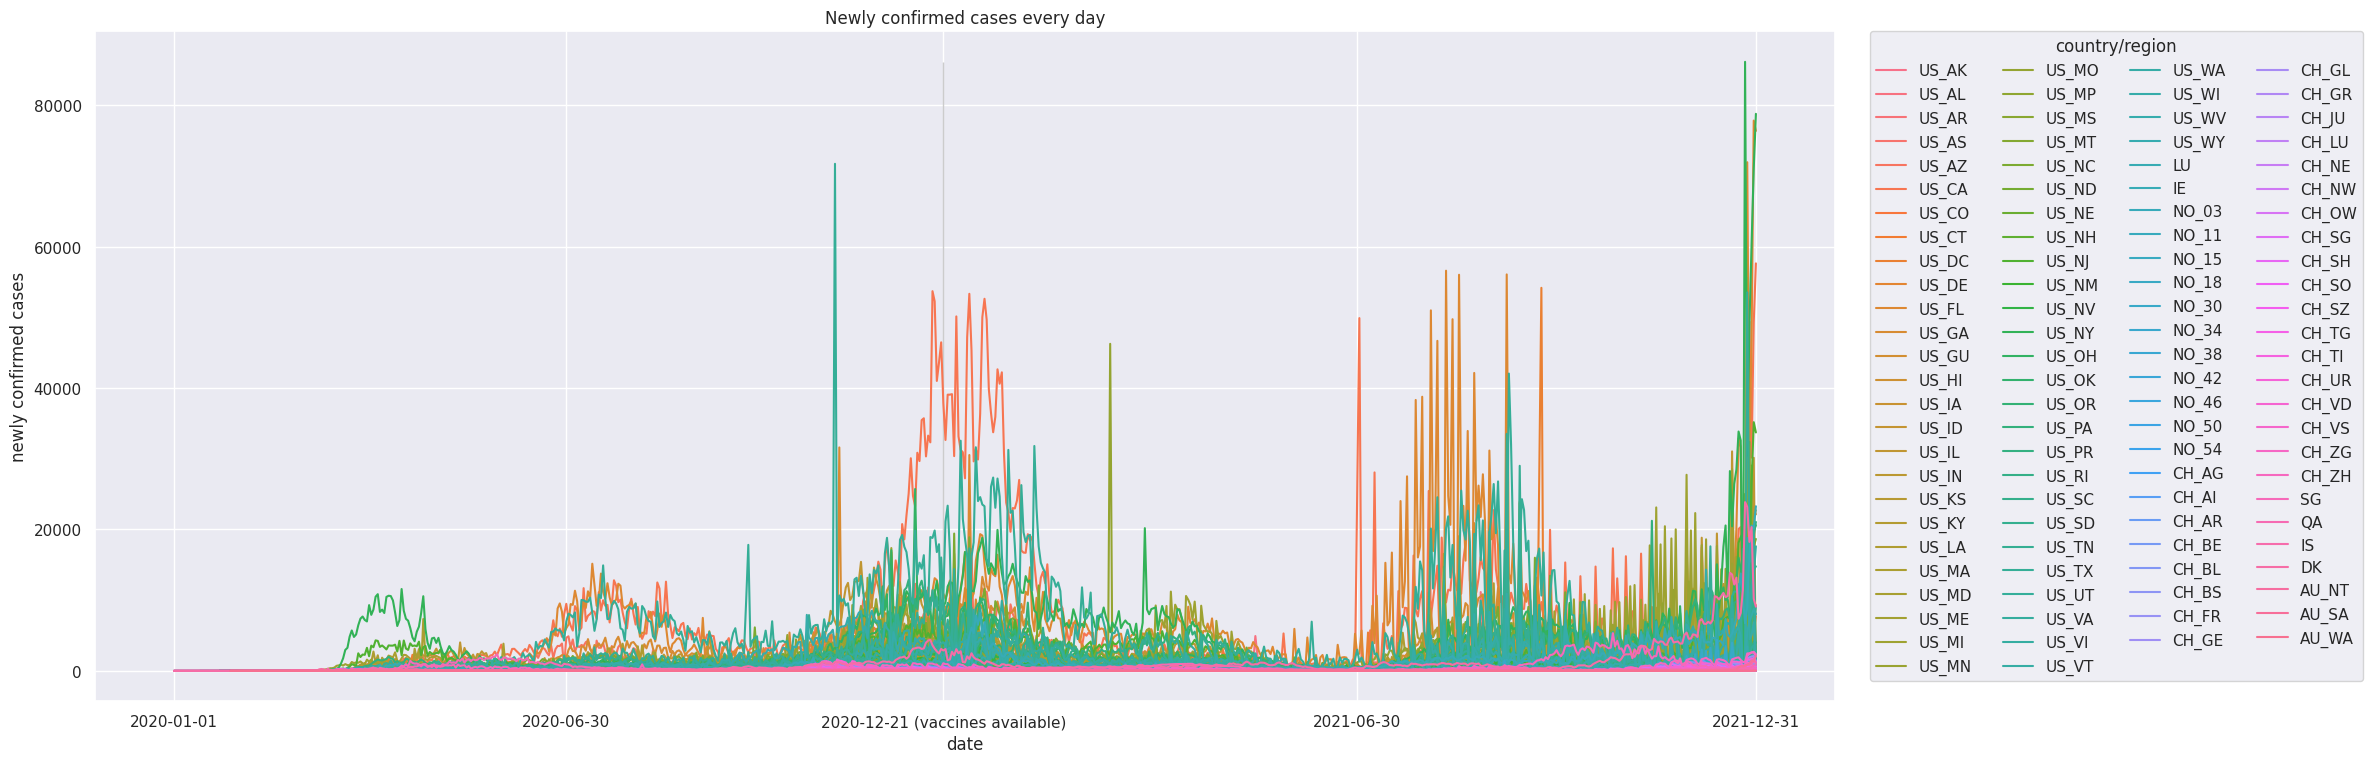

In [117]:
# plot the new confirmed with respect to time
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = 'date', y = 'new_confirmed', hue = 'location_key_x', data = train.loc[train.new_confirmed >= 0])
# add the line for vaccine available date
sns.lineplot(x = datetime.strptime('2020-12-21', '%Y-%m-%d'), y = [0, int(max(train.new_confirmed))], color = 'black')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=4, title = 'country/region')
plt.xticks([datetime.strptime('2020-01-01', '%Y-%m-%d'),datetime.strptime('2020-06-30', '%Y-%m-%d'), datetime.strptime('2020-12-21', '%Y-%m-%d'),datetime.strptime('2021-06-30', '%Y-%m-%d'),datetime.strptime('2021-12-31', '%Y-%m-%d')], labels=['2020-01-01','2020-06-30','2020-12-21 (vaccines available)', '2021-06-30', '2021-12-31'])

plt.title(label = 'Newly confirmed cases every day')
plt.ylabel('newly confirmed cases')
plt.show()

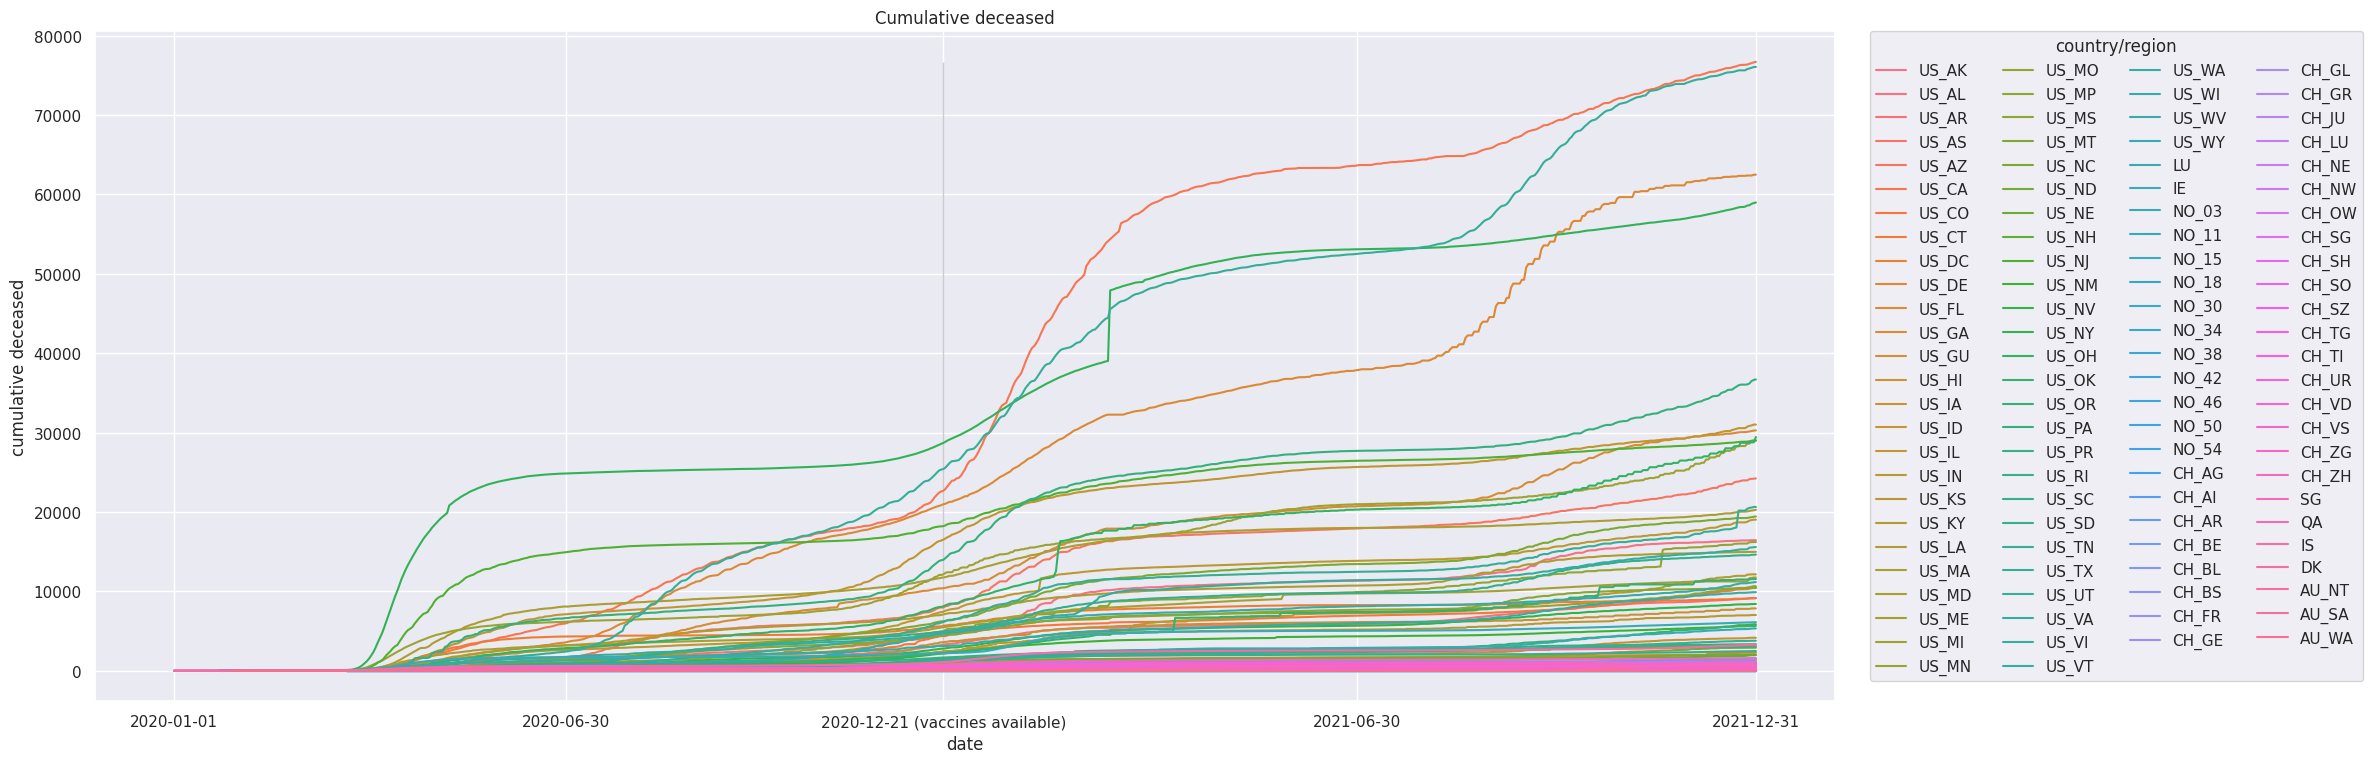

In [116]:
# plot the cumulative deceased with respect to time
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = 'date', y = 'cumulative_deceased', hue = 'location_key_x', data = train)
# add the line for vaccine available date
sns.lineplot(x = datetime.strptime('2020-12-21', '%Y-%m-%d'), y = [0, int(max(train.cumulative_deceased))], color = 'black')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=4, title = 'country/region')
plt.xticks([datetime.strptime('2020-01-01', '%Y-%m-%d'),datetime.strptime('2020-06-30', '%Y-%m-%d'), datetime.strptime('2020-12-21', '%Y-%m-%d'),datetime.strptime('2021-06-30', '%Y-%m-%d'),datetime.strptime('2021-12-31', '%Y-%m-%d')], labels=['2020-01-01','2020-06-30','2020-12-21 (vaccines available)', '2021-06-30', '2021-12-31'])

plt.title(label = 'Cumulative deceased')
plt.ylabel('cumulative deceased')
plt.show()

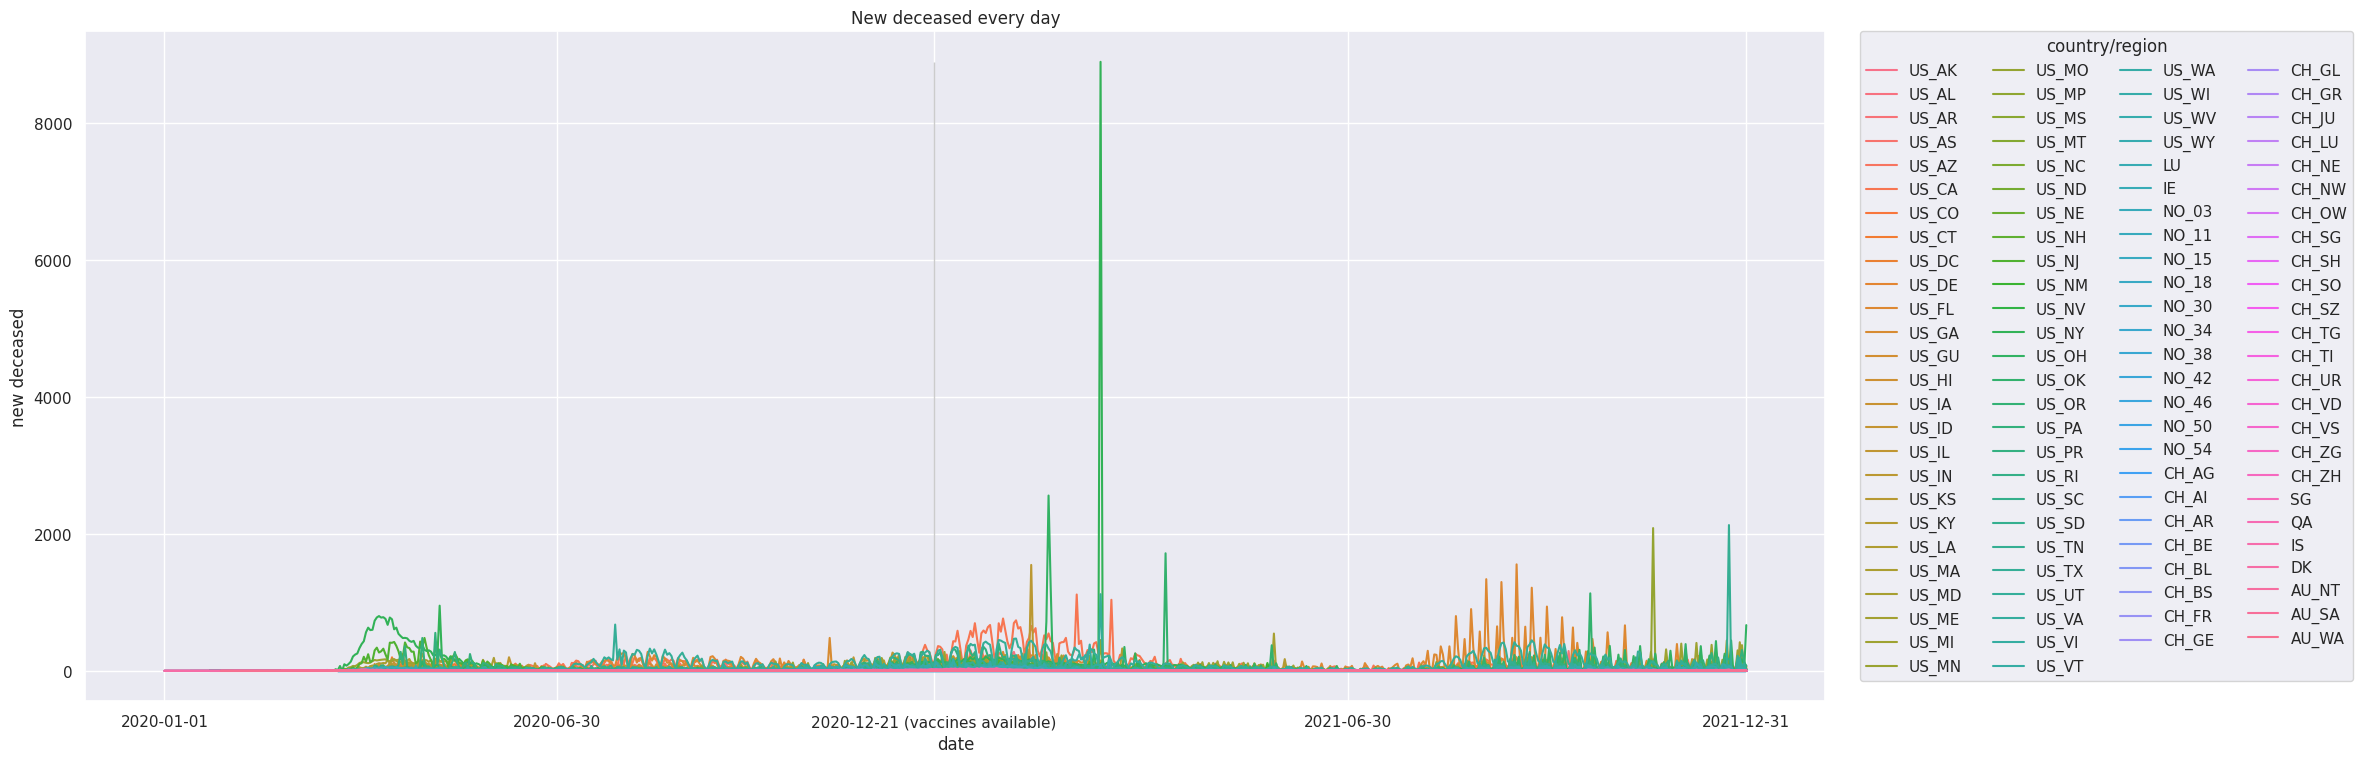

In [115]:
# plot the new deceased with respect to time
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = 'date', y = 'new_deceased', hue = 'location_key_x', data = train)
# add the line for vaccine available date
sns.lineplot(x = datetime.strptime('2020-12-21', '%Y-%m-%d'), y = [0, int(max(train.new_deceased))], color = 'black')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=4, title = 'country/region')
plt.xticks([datetime.strptime('2020-01-01', '%Y-%m-%d'),datetime.strptime('2020-06-30', '%Y-%m-%d'), datetime.strptime('2020-12-21', '%Y-%m-%d'),datetime.strptime('2021-06-30', '%Y-%m-%d'),datetime.strptime('2021-12-31', '%Y-%m-%d')], labels=['2020-01-01','2020-06-30','2020-12-21 (vaccines available)', '2021-06-30', '2021-12-31'])

plt.title(label = 'New deceased every day')
plt.ylabel('new deceased')
plt.show()

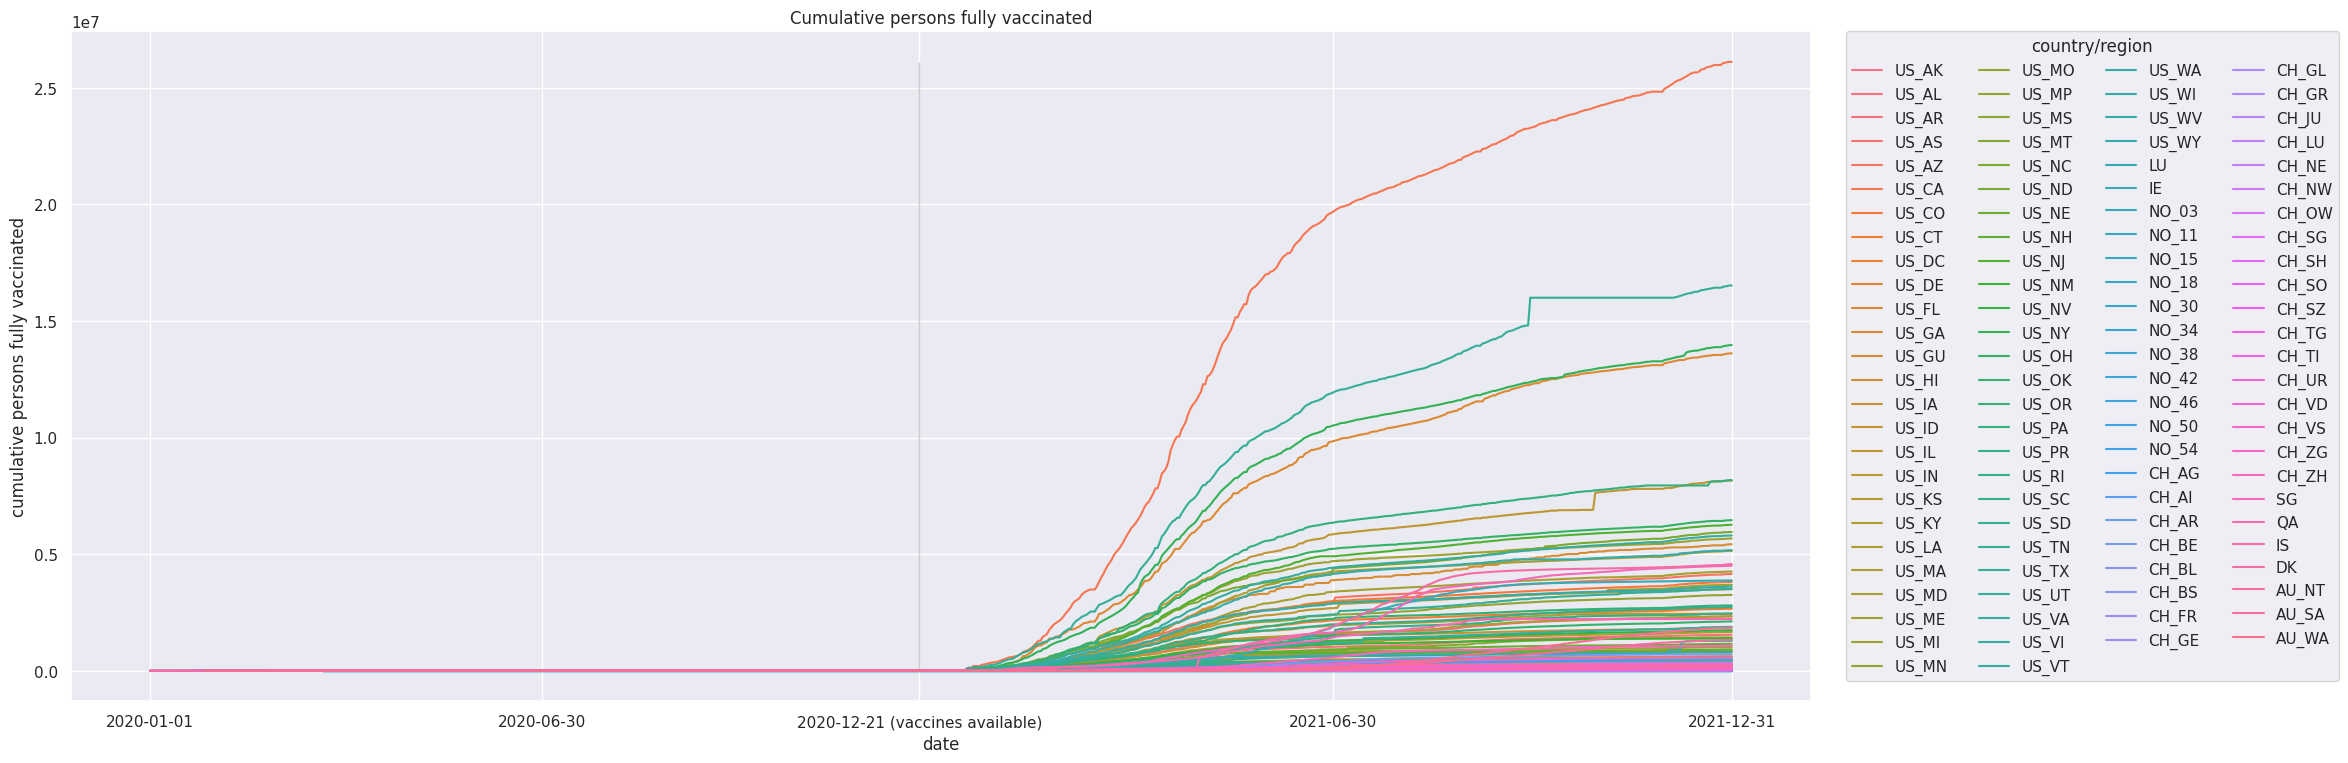

In [114]:
# plot the cumulative vaccinated with respect to time
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = 'date', y = 'cumulative_persons_fully_vaccinated', hue = 'location_key_x', data = train)
# add the line for vaccine available date
sns.lineplot(x = datetime.strptime('2020-12-21', '%Y-%m-%d'), y = [0, int(max(train.cumulative_persons_fully_vaccinated))], color = 'black')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=4, title = 'country/region')
plt.xticks([datetime.strptime('2020-01-01', '%Y-%m-%d'),datetime.strptime('2020-06-30', '%Y-%m-%d'), datetime.strptime('2020-12-21', '%Y-%m-%d'),datetime.strptime('2021-06-30', '%Y-%m-%d'),datetime.strptime('2021-12-31', '%Y-%m-%d')], labels=['2020-01-01','2020-06-30','2020-12-21 (vaccines available)', '2021-06-30', '2021-12-31'])

plt.title(label = 'Cumulative persons fully vaccinated')
plt.ylabel('cumulative persons fully vaccinated')
plt.show()

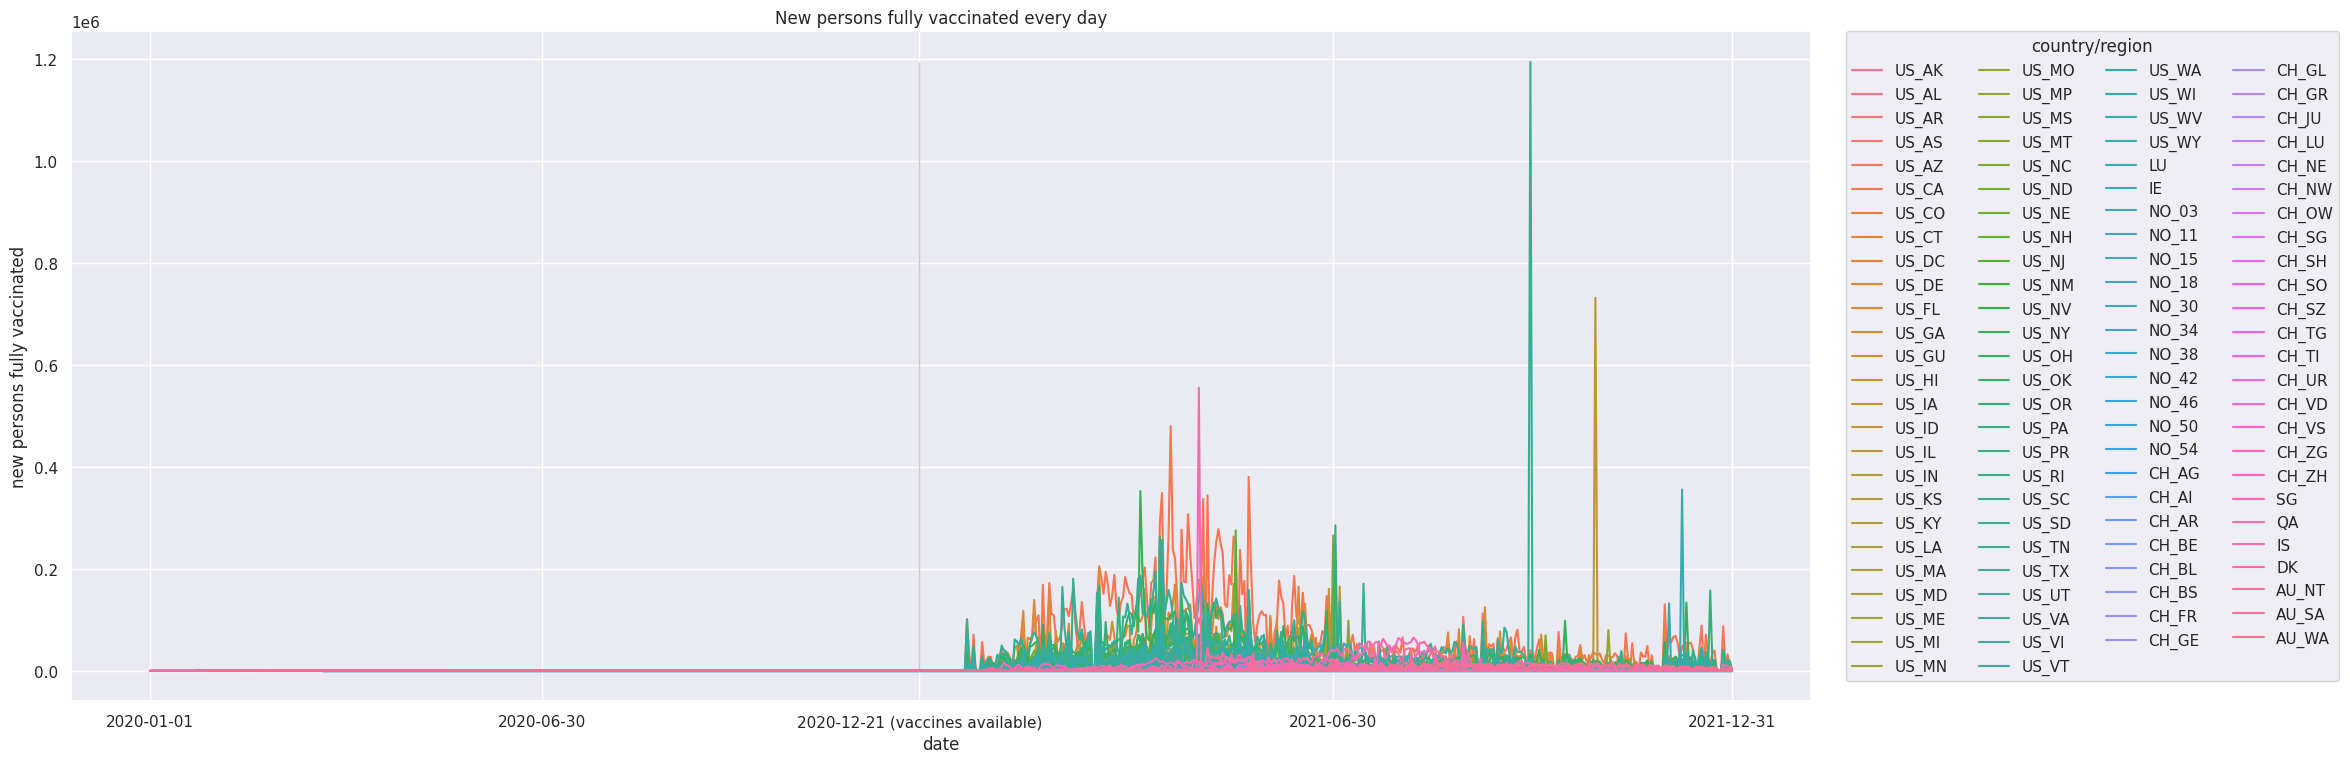

In [112]:
# plot the new vaccinated with respect to time
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = 'date', y = 'new_persons_fully_vaccinated', hue = 'location_key_x', data = train)
# add the line for vaccine available date
sns.lineplot(x = datetime.strptime('2020-12-21', '%Y-%m-%d'), y = [0, int(max(train.new_persons_fully_vaccinated))], color = 'black')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=4, title = 'country/region')
plt.xticks([datetime.strptime('2020-01-01', '%Y-%m-%d'),datetime.strptime('2020-06-30', '%Y-%m-%d'), datetime.strptime('2020-12-21', '%Y-%m-%d'),datetime.strptime('2021-06-30', '%Y-%m-%d'),datetime.strptime('2021-12-31', '%Y-%m-%d')], labels=['2020-01-01','2020-06-30','2020-12-21 (vaccines available)', '2021-06-30', '2021-12-31'])

plt.title(label = 'New persons fully vaccinated every day')
plt.ylabel('new persons fully vaccinated')
plt.show()

In [37]:
train.loc[train.cumulative_persons_fully_vaccinated > 0,'date'].sort_values(ascending = True)

63455    2020-12-21
63456    2020-12-22
63457    2020-12-23
63458    2020-12-24
63459    2020-12-25
            ...    
57737    2021-12-31
34789    2021-12-31
35499    2021-12-31
26979    2021-12-31
70828    2021-12-31
Name: date, Length: 31946, dtype: object